# **Processing Text - Final Project**

**05. Forecasting with Prophet**

SENTIMENT AND PUBLIC OPINION ANALYSIS ON THE NEW MINISTER OF FINANCE, PURBAYA YUDHI SADEWA, ON THE YOUTUBE PLATFORM USING INDOBERT, DBSCAN, K-MEANS CLUSTERING, AND PROPHET

The Member of the Group 5 of Final Project

- Abdullah Al-Firdaus Nuzula 	(24031554008)
- Halilatunnisa 			        (24031554130)
- Elvira Tiara Suci Tambunan 	(24031554213)

Lecturer: Ulfa Siti Nuraini, S.Stat., M.Stat.

## **Install Library**

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_labeled_sentiment = "/content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Cleaning Data Result/Cleaning_Data_IndoBERT_Sentiment_Label.xlsx"

print(f"Membaca file: {path_labeled_sentiment}...")
df = pd.read_excel(path_labeled_sentiment)

print("Data awal:")
display(df.head())


Membaca file: /content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Cleaning Data Result/Cleaning_Data_IndoBERT_Sentiment_Label.xlsx...
Data awal:


,text_display,cleaned_text,published_at,author,like_count,label
0,Bagus pak Purbaya sikat kalau sdh ngaco berhub...,bagus bapak purbaya sikat kalau sudah ngaco be...,2025-11-07 09:33:05,@hendywirawan6870,0,positive
1,Bener sekali kalo mau pinjam kur harus ada ang...,benar sekali kalau mau pinjam kur harus ada an...,2025-11-07 09:32:53,@Farah-hl5ct,0,positive
2,mantul pak menkeu,mantul bapak menteri keuangan,2025-11-07 07:55:01,@indrapujiwiyatno,0,positive
3,kita baru tahu slama bertahun2 slama ini baru ...,kita baru tahu slama bertahun slama ini baru a...,2025-11-06 19:33:45,@marliaheumarvggy5850,0,negative
4,pak purbaya sehat selalu panjang umur,bapak purbaya sehat selalu panjang umur,2025-11-06 19:31:00,@marliaheumarvggy5850,0,positive


In [ ]:
df['published_at'] = pd.to_datetime(df['published_at'])

tanggal_terakhir = df['published_at'].max()
tanggal_awal = df['published_at'].min()

print(f"Data paling awal: {tanggal_awal}")
print(f"Data paling akhir: {tanggal_terakhir}")

Data paling awal: 2025-07-15 12:04:33
Data paling akhir: 2025-11-07 10:59:41


In [ ]:
print("\nMelakukan persiapan data untuk Prophet...")

nama_kolom_waktu = 'published_at'
df[nama_kolom_waktu] = pd.to_datetime(df[nama_kolom_waktu])

df[nama_kolom_waktu] = df[nama_kolom_waktu].dt.tz_localize(None)

nama_kolom_label = 'label'

print(f"Label unik ditemukan: {df[nama_kolom_label].unique()}")

sentiment_map = {
    'positive': 1,  # atau 'LABEL_2'
    'netral': 0,   # atau 'LABEL_1'
    'negative': -1  # atau 'LABEL_0'
}

df['score'] = df[nama_kolom_label].map(sentiment_map)
df['date_only'] = df[nama_kolom_waktu].dt.date
daily_data = df.groupby('date_only')['score'].mean().reset_index()

df_prophet = daily_data.rename(columns={'date_only': 'ds', 'score': 'y'})

print("\nData Siap untuk Prophet (5 baris pertama):")
display(df_prophet.head())


Melakukan persiapan data untuk Prophet...
Label unik ditemukan: ['positive' 'negative' 'neutral']

Data Siap untuk Prophet (5 baris pertama):


,ds,y
0,2025-07-15,0.391304
1,2025-07-16,0.483871
2,2025-07-17,0.428571
3,2025-07-18,0.500000
4,2025-07-19,0.333333


In [ ]:
print("\nMelatih Model Prophet...")

m = Prophet(changepoint_prior_scale=0.1, daily_seasonality=False)

m.fit(df_prophet)
print("Model selesai dilatih!")S

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.



Melatih Model Prophet...
Model selesai dilatih!


In [ ]:
for_next_day = 14
print(f"\nMembuat prediksi untuk {for_next_day} hari ke depan...")

future = m.make_future_dataframe(periods=for_next_day)
forecast = m.predict(future)

print("Hasil Prediksi:")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


Membuat prediksi untuk 14 hari ke depan...
Hasil Prediksi:


,ds,yhat,yhat_lower,yhat_upper
109,2025-11-17,0.437008,-0.116958,0.914458
110,2025-11-18,0.377031,-0.148764,0.871650
111,2025-11-19,0.449614,-0.074810,0.966129
112,2025-11-20,0.373815,-0.142041,0.851078
113,2025-11-21,0.522104,0.022656,1.017750


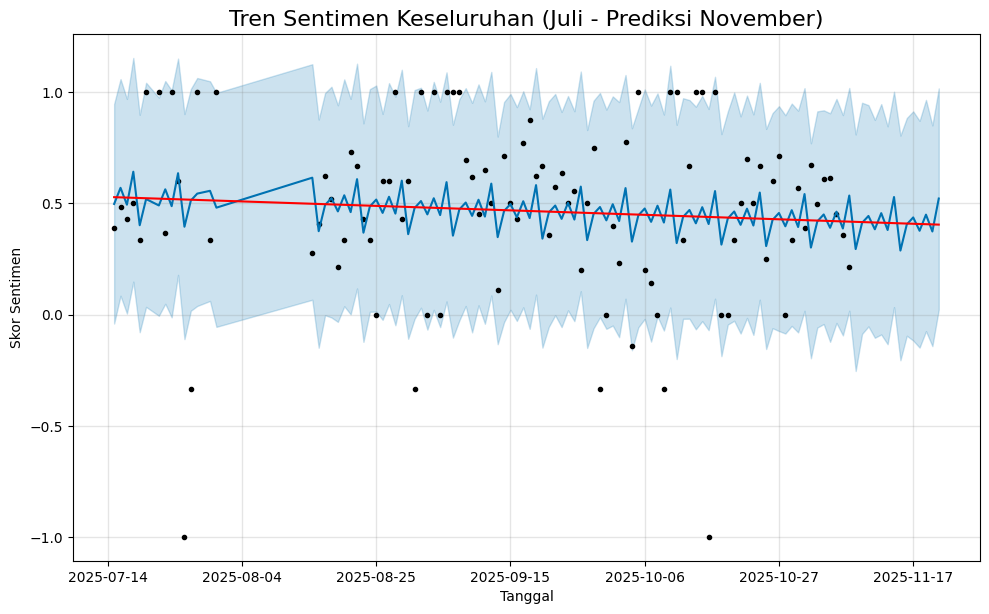

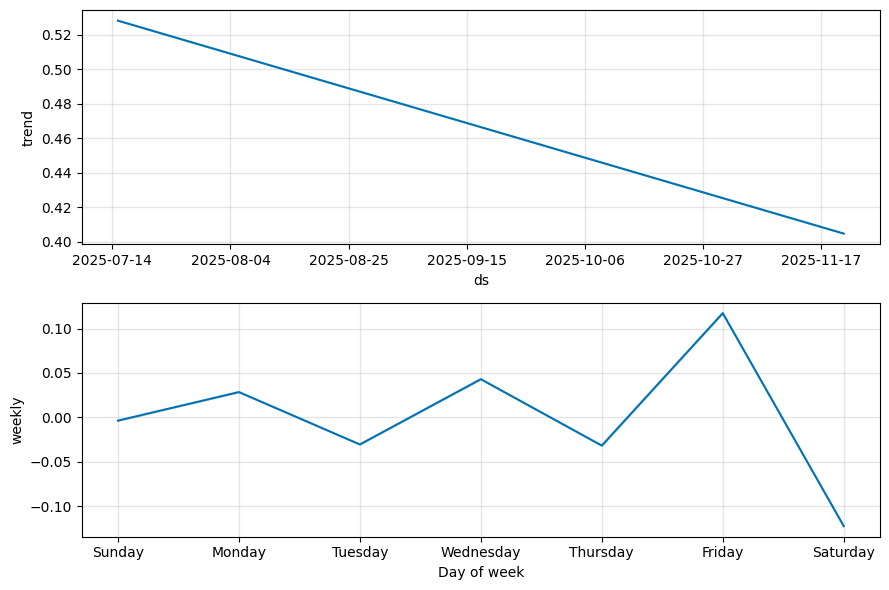

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
plt.title('Tren Sentimen Keseluruhan (Juli - Prediksi November)', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Skor Sentimen')
plt.show()

fig2 = m.plot_components(forecast)
plt.show()

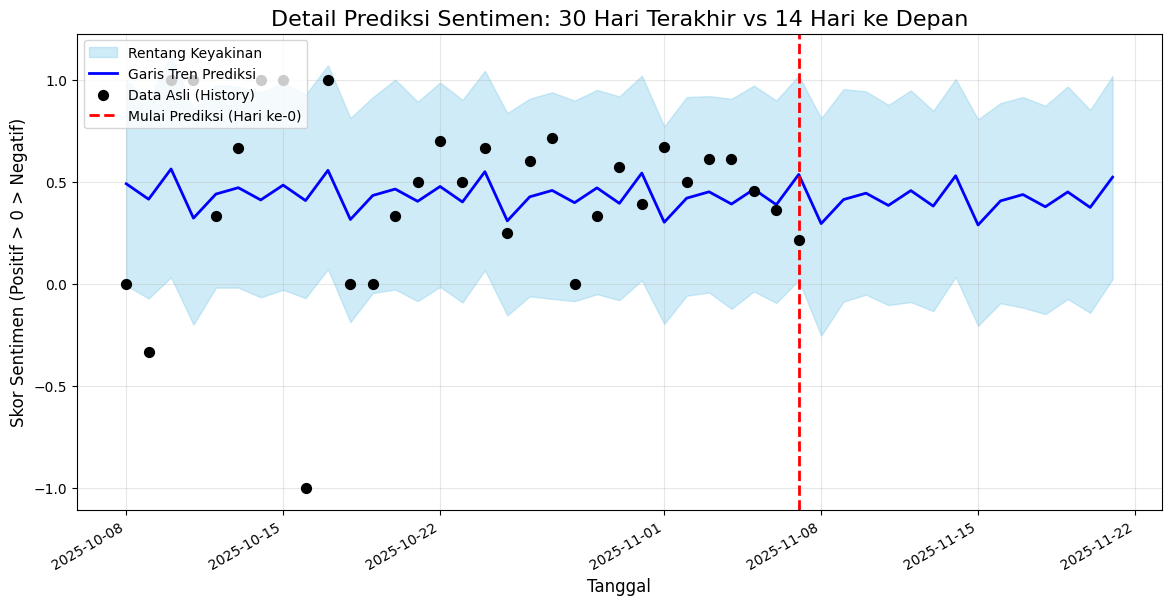

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

tanggal_terakhir_data = df_prophet['ds'].max()

mulai_zoom_ts = pd.to_datetime(tanggal_terakhir_data) - pd.Timedelta(days=30)

mulai_zoom_date = tanggal_terakhir_data - datetime.timedelta(days=30)

forecast_zoom = forecast[forecast['ds'] >= mulai_zoom_ts]
data_asli_zoom = df_prophet[df_prophet['ds'] >= mulai_zoom_date]

plt.figure(figsize=(14, 7))

plt.fill_between(forecast_zoom['ds'],
                 forecast_zoom['yhat_lower'],
                 forecast_zoom['yhat_upper'],
                 color='skyblue', alpha=0.4, label='Rentang Keyakinan')

plt.plot(forecast_zoom['ds'], forecast_zoom['yhat'],
         color='blue', linewidth=2, label='Garis Tren Prediksi')

plt.scatter(data_asli_zoom['ds'], data_asli_zoom['y'],
            color='black', s=50, zorder=5, label='Data Asli (History)')

plt.axvline(x=tanggal_terakhir_data, color='red', linestyle='--', linewidth=2, label='Mulai Prediksi (Hari ke-0)')

plt.title('Detail Prediksi Sentimen: 30 Hari Terakhir vs 14 Hari ke Depan', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Skor Sentimen (Positif > 0 > Negatif)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='30 days', period='7 days', horizon = '14 days')
df_p = performance_metrics(df_cv)

df_p

INFO:prophet:Making 11 forecasts with cutoffs between 2025-08-15 00:00:00 and 2025-10-24 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,2 days,0.231093,0.480721,0.405442,0.489647,1.005534,0.587879
1,3 days,0.193554,0.439947,0.351147,0.389753,0.751693,0.703030
2,4 days,0.142418,0.377383,0.299939,0.439764,0.816561,0.727273
3,5 days,0.115890,0.340426,0.285551,0.484368,0.714967,0.727273
4,6 days,0.327436,0.572220,0.411477,0.427697,0.770624,0.660606
5,7 days,0.186452,0.431800,0.315831,0.436943,0.553018,0.703030
6,8 days,0.279042,0.528245,0.415724,0.498622,0.993069,0.593939
7,9 days,0.210759,0.459085,0.378440,0.585465,0.973328,0.678788
8,10 days,0.176277,0.419854,0.328987,0.279865,0.732455,0.727273
9,11 days,0.142648,0.377687,0.306455,0.561710,0.834764,0.793939


In [ ]:
# Accuracy by MAE
df_p['accuracy_real'] = 1 - (df_p['mae'] / 2)
df_p['accuracy_percent'] = df_p['accuracy_real'].apply(lambda x: f"{x*100:.2f}%")

print("Tingkat Akurasi Model Prophet Anda:")
display(df_p[['horizon', 'mae', 'accuracy_percent']])

avg_acc = df_p['accuracy_real'].mean()
print(f"Rata rata akurasi model : {avg_acc*100:.2f}%")

Tingkat Akurasi Model Prophet Anda:


,horizon,mae,accuracy_percent
0,2 days,0.405442,79.73%
1,3 days,0.351147,82.44%
2,4 days,0.299939,85.00%
3,5 days,0.285551,85.72%
4,6 days,0.411477,79.43%
5,7 days,0.315831,84.21%
6,8 days,0.415724,79.21%
7,9 days,0.378440,81.08%
8,10 days,0.328987,83.55%
9,11 days,0.306455,84.68%


Rata rata akurasi model : 82.33%


In [ ]:
import os

output_file = "/content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Dataset After Method/Hasil_Forecasting_Prophet.xlsx"
print(f"Menyimpan hasil ke: {output_file}...")

output_dir = os.path.dirname(output_file)
os.makedirs(output_dir, exist_ok=True)
print(f"Direktori '{output_dir}' dipastikan ada.")

forecast.to_excel(output_file, index=False)
print("BERHASIL!")

Menyimpan hasil ke: /content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Dataset After Method/Hasil_Forecasting_Prophet.xlsx...
Direktori '/content/drive/MyDrive/Akademik - UNESA /Semester 3/Processing Text/008_130_213_Group5_PemteksFinalProject/Dataset After Method' dipastikan ada.
BERHASIL!


In [ ]:
print(forecast.columns.tolist())

['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']
